In [1]:
import import_ipynb
import preprocess_model as pre

importing Jupyter notebook from preprocess_model.ipynb

Shape: (1316, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Total Population                            1316 non-null   float64
 1   Female Population                           1316 non-null   float64
 2   Male Population                             1316 non-null   float64
 3   Birth Rate                                  1269 non-null   float64
 4   Death Rate                                  1269 non-null   float64
 5   Compulsory Education Dur.                   1041 non-null   float64
 6   Employment in Industry(%)                   1267 non-null   float64
 7   Employment in Agriculture(%)                1267 non-null   float64
 8   Female Employment in Agriculture(%)         1267 non-null   float64
 9   Female Empl

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
df = pre.df_fnn


# Define the learning rate


In [4]:
learning_rate = 0.0001  


# Define the model


In [5]:
input_layers = []
embedding_layers = []

for country in pre.Country:
    input_layer = Input(shape=(1,), name=country)
    embedding_layer = Embedding(input_dim=len(df[country].unique()), output_dim=10)(input_layer)
    flatten_layer = Flatten()(embedding_layer)
    input_layers.append(input_layer)
    embedding_layers.append(flatten_layer)

input = Input(shape=(len(pre.X_col),), name='input')
embedding_layers.append(input)



# Concatenate all input layers


In [6]:
concatenated = Concatenate()(embedding_layers)



# Fully connected layers with dropout for regularization


In [7]:
x = Dense(256, activation='relu')(concatenated)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(1, activation='linear', name='output')(x)



# Model


In [8]:
model = Model(inputs=input_layers + [input], outputs=output_layer)



# Compile the model with Mean Squared Error loss and the specified learning rate


In [9]:
model.compile(optimizer=Adam(lr=learning_rate), loss='mean_squared_error') #soft-max reg



# Train the model for more epochs


In [10]:
history = model.fit([pre.X_train[country] for country in pre.Country] + [pre.X_train[pre.X_col]],
                    pre.y_train, epochs=200, batch_size=64,
                    validation_data=([pre.X_val[country] for country in pre.Country] + [pre.X_val[pre.X_col]], pre.y_val),
                    verbose=1)


Epoch 1/200




# Evaluate the model on the test set


In [ ]:
test_loss = model.evaluate([pre.X_test[country] for country in pre.Country] + [pre.X_test[pre.X_col]], pre.y_test)
print(f'Test Loss: {test_loss}')


9/9 [==============================] - 0s 4ms/step - loss: 103.6398
Test Loss: 103.63978576660156



# Plot the training history


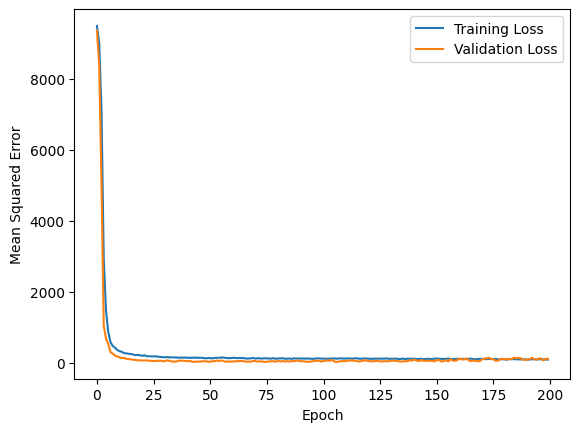

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## Make predictions


In [ ]:
# test = ['School enrollment, primary', 'School enrollment, tertiary', 'Primary completion rate', 'Year', 'Country']
# # print(df[test])
# new_data = pd.DataFrame({
#     'School enrollment, primary': [100.911263,100.911262512207],
#     'School enrollment, tertiary': [28.845509  ,28.8455085754395],
#     'Primary completion rate': [96.636715, 96.63671493530276],
#     'Year': [2023,2023],
#     'Country': ["Afghanistan", "Japan"],
# })

# # 100.911262512207,28.8455085754395,96.63671493530276
# # Preprocess the new data similar to the training data
# # Standardize numerical features
# new_data[pre.X_col] = pre.scaler.transform(new_data[pre.X_col])

# # Preprocess
# for country in pre.Country:
#     new_data[country] = pre.label_encoders[country].transform(new_data[country])

# # # Make predictions on the new data
# predictions_future = model.predict([new_data[country] for country in pre.Country] + [new_data[pre.X_col]])
# print(predictions_future)

predictions = model.predict([pre.X_test[country] for country in pre.Country] + [pre.X_test[pre.X_col]])
# print(pre.y_test)
print(predictions)
# import seaborn as sns

# sns.kdeplot(pre.y_test, label='Actual', shade=True)
# sns.kdeplot(predictions.flatten(), label='Predicted', shade=True)
# plt.xlabel('Literacy rate')
# plt.ylabel('Literacy rate')
# plt.title('Distribution of Actual vs. Predicted Literacy rate')
# plt.show()
# residuals = pre.y_test - predictions.flatten()

# plt.scatter(pre.y_test, residuals)
# plt.axhline(y=0, color='red', linestyle='--')
# plt.xlabel('Actual Literacy rate')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()


mse = mean_squared_error(pre.y_test, predictions)
mae = mean_absolute_error(pre.y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


9/9 [==============================] - 0s 2ms/step
[[89.629074]
 [91.92106 ]
 [90.99696 ]
 [90.53458 ]
 [92.01217 ]
 [89.38776 ]
 [90.76846 ]
 [88.33765 ]
 [87.24007 ]
 [88.414474]
 [88.97647 ]
 [88.20984 ]
 [87.92676 ]
 [89.29119 ]
 [89.43152 ]
 [85.713234]
 [89.23633 ]
 [88.728836]
 [88.39129 ]
 [89.99176 ]
 [85.87009 ]
 [88.827965]
 [89.26924 ]
 [88.76424 ]
 [88.30045 ]
 [89.14603 ]
 [87.30811 ]
 [90.52429 ]
 [87.76126 ]
 [91.62814 ]
 [91.76642 ]
 [89.631584]
 [88.87352 ]
 [91.48867 ]
 [90.185715]
 [89.76012 ]
 [90.774445]
 [86.95358 ]
 [89.70914 ]
 [88.225876]
 [91.81262 ]
 [88.703995]
 [88.634415]
 [88.14436 ]
 [88.17383 ]
 [88.847305]
 [89.79915 ]
 [87.6613  ]
 [87.90974 ]
 [82.72186 ]
 [90.2332  ]
 [82.76777 ]
 [90.14378 ]
 [88.572784]
 [88.31919 ]
 [88.18851 ]
 [86.23052 ]
 [87.40251 ]
 [88.20032 ]
 [86.66582 ]
 [89.93524 ]
 [90.474304]
 [90.42265 ]
 [86.22623 ]
 [87.41283 ]
 [88.75159 ]
 [89.21303 ]
 [88.155716]
 [90.20419 ]
 [91.364975]
 [89.20895 ]
 [87.90545 ]
 [89.25434 ]
